1.959963984540054


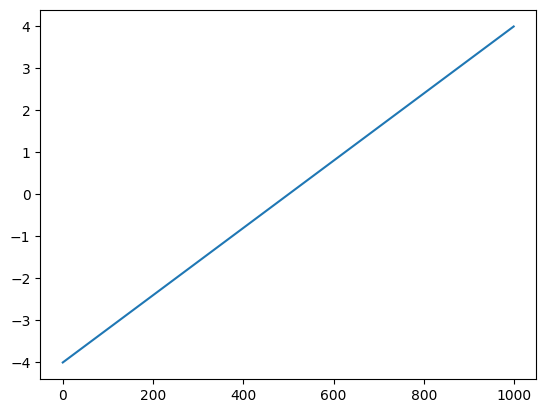

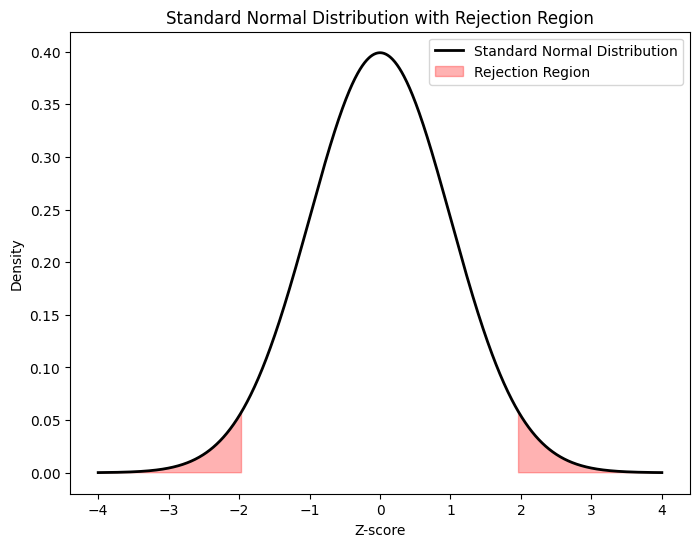

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Plotting the Rejectin Region

# Generate x values for the standard normal distribution
x=np.linspace(-4, 4, 1000)
significance_level=0.05
plt.plot(x)

# Calculate the critical z-scores
# ppf = percent point function
z_critical=stats.norm.ppf(1 - significance_level/2)
print(z_critical)

# Plot the standard normal distribution
plt.figure(figsize=(8,6))
plt.plot(x, stats.norm.pdf(x), 'black', lw=2, label='Standard Normal Distribution')

# Shade the rejection region
plt.fill_between(x, stats.norm.pdf(x), where=(x <= -z_critical) | (x >= z_critical),
                 color='red', alpha=0.3, label='Rejection Region')

# Add labels and title
plt.title('Standard Normal Distribution with Rejection Region')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend()
plt.show()

# Perform Test Statistic and Calculate P-Value

In [12]:
# Sample data (weights)
sample=[150,155,160,165,170,175,180]

# Sample statistics
samplemean=np.mean(sample)
print(samplemean)
samplestd=np.std(sample,ddof=1)
samplesize=len(sample)

# Hypothesized mean
mu_0=165

# Calculate the z-score
zscore=(samplemean-mu_0)/(samplestd/np.sqrt(samplesize))

# Calculate the p-value
pvalue=2*(1 - stats.norm.cdf(np.abs(zscore)))

165.0


In [13]:
pvalue

1.0

In [14]:
# if p_value <= significance_level:
#     decision = 'Reject H0'
# else:
#     decision = 'Fail to reject H0'

In [15]:
if pvalue<=significance_level:
    conclusion="There is evidence to support that the mean weight is different from 165."
else:
    conclusion='There is insufficient evidence to support that the mean weight is different from 165.'

print(conclusion)

There is insufficient evidence to support that the mean weight is different from 165.


# Z-test

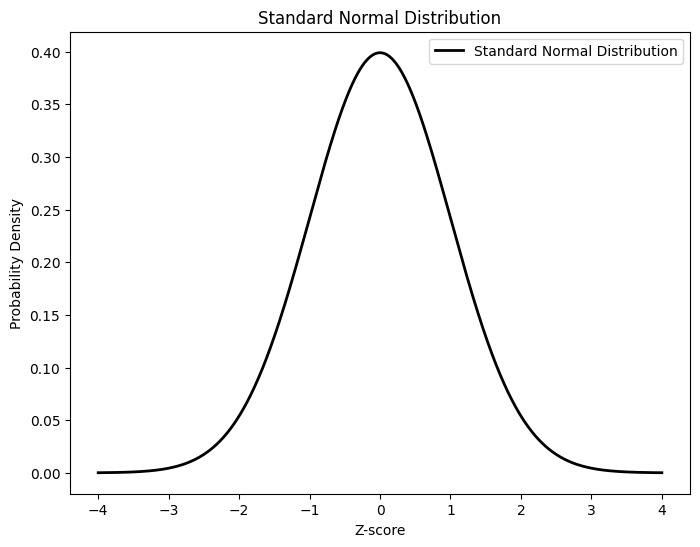

In [16]:
# Generate x values for the standard normal distribution
x=np.linspace(-4, 4, 1000)

# Calculate the probability density funcion(PDF) for each x value
pdf=stats.norm.pdf(x)

# Plot the standard normal distribution
plt.figure(figsize=(8,6))
plt.plot(x, pdf, 'black', lw=2, label='Standard Normal Distribution')

# Add labels and title
plt.title('Standard Normal Distribution')
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [17]:
# Sample data
data = [68, 70, 72, 74, 76]

# Mean and standard deviation of the sample
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# Calculate z-scores for each data point
z_scores = (data - mean) / std_dev

# Print the z-scores
for i, z in enumerate(z_scores):
    print(f"Data point {i+1}: z-score = {z:.2f}")

Data point 1: z-score = -1.26
Data point 2: z-score = -0.63
Data point 3: z-score = 0.00
Data point 4: z-score = 0.63
Data point 5: z-score = 1.26


# T-score

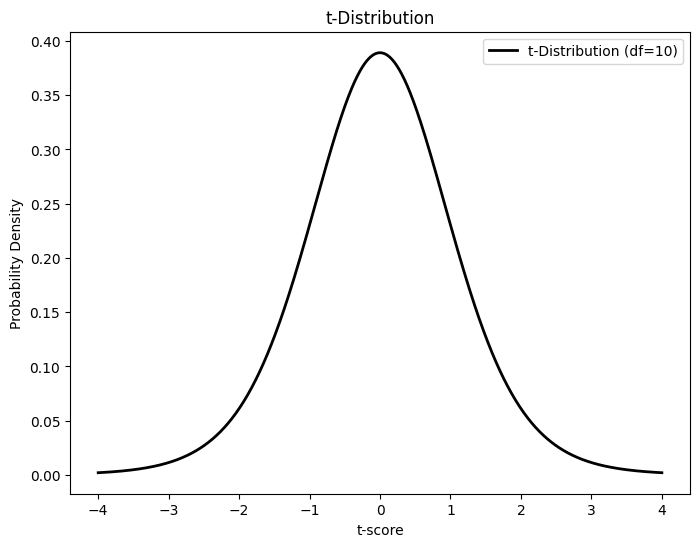

In [18]:
# Degrees of freedom for the t-distribution
df = 10

# Generate x values for the t-distribution
x = np.linspace(-4, 4, 1000)

# Calculate the probability density function (PDF) for each x value
pdf = stats.t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, 'black', lw=2, label='t-Distribution (df=10)')

# Add labels and title
plt.title('t-Distribution')
plt.xlabel('t-score')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [19]:
# Sample data
data = [68, 70, 72, 74, 76]

# Hypothesized population mean
hypothesized_mean = 75

# Sample mean and sample standard deviation
sample_mean = np.mean(data)
sample_std_dev = np.std(data, ddof=1)

# Calculate the standard error of the estimate
standard_error = sample_std_dev / np.sqrt(len(data))

# Calculate the t-score
t_score = (sample_mean - hypothesized_mean) / standard_error

# Print the t-score
print(f"t-score = {t_score:.2f}")

t-score = -2.12


In [20]:
# Hypothesized population mean
hypothesized_mean = 75

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data, hypothesized_mean)

# Print the t-statistic and p-value
print(f"t-statistic = {t_statistic:.2f}")
print(f"p-value = {p_value:.4f}")

t-statistic = -2.12
p-value = 0.1012


# Chi Square Test

In [21]:
import pandas as pd

In [22]:
# Create a contingency table
data = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'B', 'C', 'C'],
                     'Outcome': ['Success', 'Failure', 'Success', 'Failure', 'Success', 'Success', 'Failure']})

contingency_table = pd.crosstab(data['Category'], data['Outcome'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistic, p-value, and expected frequencies
print(f"Chi-square test statistic = {chi2_stat:.2f}")
print(f"P-value = {p_value:.4f}")
print("Expected frequencies:")
print(expected)

Chi-square test statistic = 0.19
P-value = 0.9074
Expected frequencies:
[[0.85714286 1.14285714]
 [1.28571429 1.71428571]
 [0.85714286 1.14285714]]


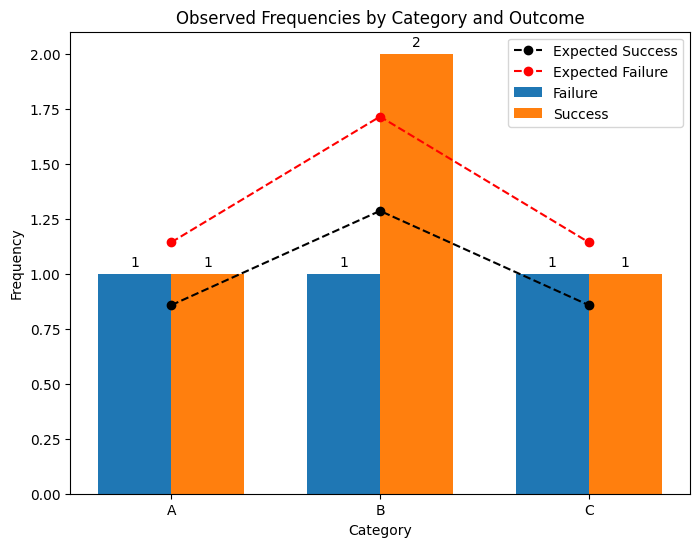

In [23]:
# Plot the observed and expected frequencies
categories = contingency_table.index
outcomes = contingency_table.columns

observed_freq = np.array(contingency_table)
expected_freq = np.array(expected)

width = 0.35
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, observed_freq[:, 0], width, label=outcomes[0])
rects2 = ax.bar(x + width/2, observed_freq[:, 1], width, label=outcomes[1])

ax.set_xlabel('Category')
ax.set_ylabel('Frequency')
ax.set_title('Observed Frequencies by Category and Outcome')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add text labels for the observed frequencies
for i, rect in enumerate(rects1):
    height = rect.get_height()
    ax.annotate(f'{observed_freq[i, 0]}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

for i, rect in enumerate(rects2):
    height = rect.get_height()
    ax.annotate(f'{observed_freq[i, 1]}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Add a line plot for the expected frequencies
line = ax.plot(x, expected_freq[:, 0], marker='o', linestyle='--', color='black', label='Expected Success')
line = ax.plot(x, expected_freq[:, 1], marker='o', linestyle='--', color='red', label='Expected Failure')
ax.legend()

plt.show()